# Regression and Other Stories: Simulation

Simulation of probability models. See Chapter 5 in Regression and Other Stories.

-------

### Load packages

In [1]:
using StatsPlots, Distributions, Random, StatsBase

### Simulate how many girls in 400 births?

In [2]:
n_girls = rand(Binomial(1,0.488), 400)
println(sum(n_girls));

191


### Repeat simulation 1000 times

In [3]:
n_sims = 1000
n_girls = fill(NaN, n_sims)
for s in 1:n_sims
    n_girls[s] = sum(rand(Binomial(1,0.488), 400))
end

### Plot

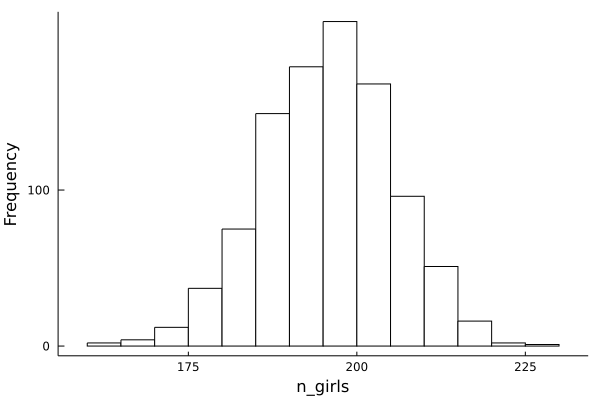

In [4]:
histogram(
    n_girls,
    color=:white,
    bins=14,
    legend=false,
    xlabel="n_girls",
    ylabel="Frequency",
    xticks=[175,200,225],
    yticks=[0,100],
    grid=false
)

### Accounting for twins

In [5]:
birth_type = sample(
    ["fraternal twin", "identical twin","single birth"],
    ProbabilityWeights([1/125, 1/300, 1- 1/125 - 1/300]),
    400
)
girls = fill(NaN, 400)
for i in 1:400
    if birth_type[i] == "single birth"
        girls[i] = rand(Binomial(1,0.488))
    elseif birth_type[i] == "identical twin"
        girls[i] = 2*rand(Binomial(1,0.495))
    elseif birth_type[i] == "fraternal twin"
        girls[i] = rand(Binomial(2,0.495))
    end
end
n_girls=sum(girls);

### Repeat 1000 times

In [6]:
n_girls = fill(NaN, n_sims)
for s in 1:n_sims
    birth_type = sample(
        ["fraternal twin", "identical twin","single birth"],
        ProbabilityWeights([1/125, 1/300, 1- 1/125 - 1/300]),
        400
    )
    girls = fill(NaN, 400)
    for i in 1:400
        if birth_type[i] == "single birth"
            girls[i] = rand(Binomial(1,0.488))
        elseif birth_type[i] == "identical twin"
            girls[i] = 2*rand(Binomial(1,0.495))
        elseif birth_type[i] == "fraternal twin"
            girls[i] = rand(Binomial(2,0.495))
        end
    end
    n_girls[s] = sum(girls)
end

### Plot

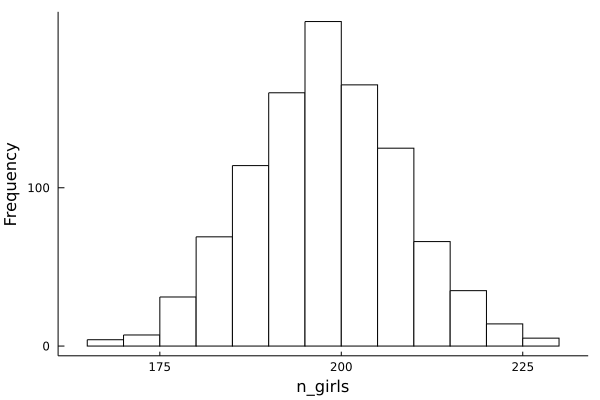

In [7]:
histogram(
    n_girls,
    color=:white,
    bins=14,
    legend=false,
    xlabel="n_girls",
    ylabel="Frequency",
    xticks=[175,200,225],
    yticks=[0,100],
    grid=false
)

### Simulation of continuous and mixed discrete/continuous models

In [8]:
n_sims = 1000
y1 = rand(Normal(3, 0.5), n_sims)
y2 = exp.(y1)
y3 = rand(Binomial(20, 0.6), n_sims)
y4 = rand(Poisson(5), n_sims);

### Plot

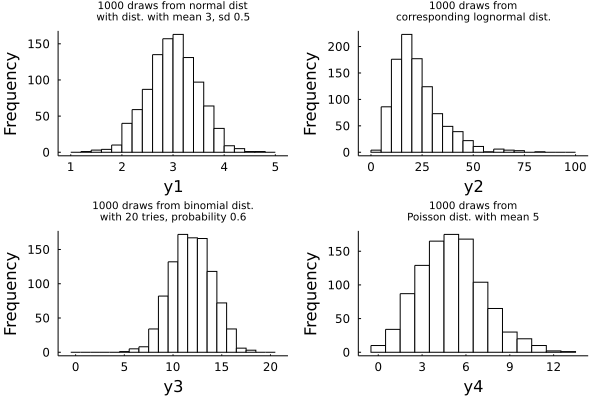

In [9]:
sty = Dict(
    :legend=>:false,
    :color=>"white",
    :grid=>false,
    :ylabel=>"Frequency",
    :titlefontsize=>7
)
# Making the titles a little cleaner...
h1 = histogram(y1, bins=floor(minimum(y1)):0.2:ceil(maximum(y1)), xlabel="y1",
    title="1000 draws from normal dist\nwith dist. with mean 3, sd 0.5";sty...)
h2 = histogram(y2, bins=0:5:ceil(maximum(y2)), xlabel="y2",
    title="1000 draws from\ncorresponding lognormal dist.";sty...)
h3 = histogram(y3, bins=-0.5:1:20.5, xlabel="y3",
    title="1000 draws from binomial dist.\nwith 20 tries, probability 0.6";sty...)
h4 = histogram(y4, bins=-0.5:1:maximum(y4)+1, xlabel="y4",
    title="1000 draws from\nPoisson dist. with mean 5";sty...)
plot(h1, h2, h3, h4, layout=4)

### Generate the height of one randomly chosen adult

In [10]:
male = rand(Binomial(1,0.48))
height = ifelse(
    male==1, 
    rand(Normal(69.1,2.9)),
    rand(Normal(64.5,2.7))
);

### Select 10 adults at random

In [11]:
N = 10
male = rand(Binomial(1,0.48), N)
height = ifelse.(
    male.==1, 
    rand(Normal(69.1,2.9)),
    rand(Normal(64.5,2.7))
)
avg_height = mean(height)
println(avg_height)

65.47652606336638


### Repeat the simulation 1000 times

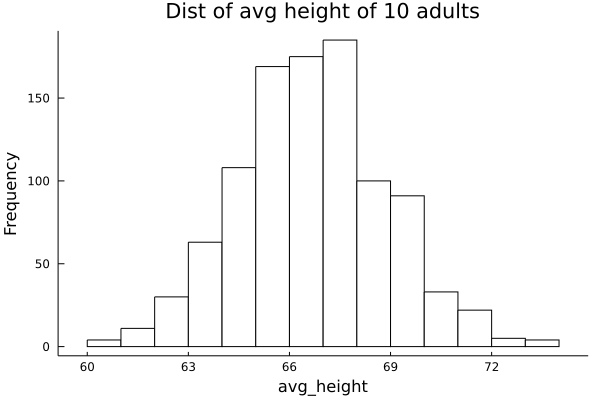

In [12]:
n_sims = 1000
avg_height = fill(NaN, n_sims)
for s in 1:n_sims
    N = 10
    male = rand(Binomial(1,0.48), N)
    height = ifelse.(
        male.==1, 
        rand(Normal(69.1,2.9)),
        rand(Normal(64.5,2.7))
    )
    avg_height[s] = mean(height)
end;
histogram(
    avg_height,
    color=:white,
    bins=15,
    legend=false,
    xlabel="avg_height",
    ylabel="Frequency",
    title="Dist of avg height of 10 adults",
    grid=false
)

### The maximum height of the 10 people

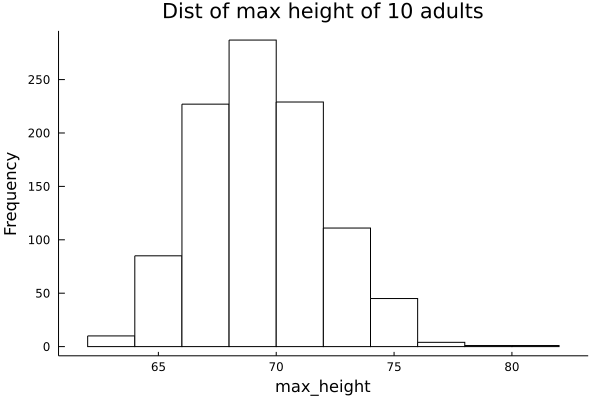

In [13]:
max_height = fill(NaN, n_sims)
n_sims = 1000
avg_height = fill(NaN, n_sims)
for s in 1:n_sims
    N = 10
    male = rand(Binomial(1,0.48), N)
    height = ifelse.(
        male.==1, 
        rand(Normal(69.1,2.9)),
        rand(Normal(64.5,2.7))
    )
    avg_height[s] = mean(height)
    max_height[s] = maximum(height)
end;
histogram(
    max_height,
    color=:white,
    bins=15,
    legend=false,
    xlabel="max_height",
    ylabel="Frequency",
    title="Dist of max height of 10 adults",
    grid=false
)